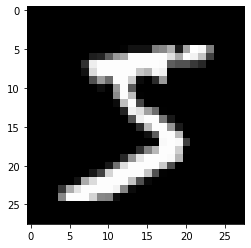

In [10]:
import numpy as np
import matplotlib.pyplot as plt

####### Step 1

# A function to plot images
def show_image(img):
    image = img.reshape((28, 28))
    plt.imshow(image, 'gray')


# Reading The Train Set
train_images_file = open('train-images.idx3-ubyte', 'rb')
train_images_file.seek(4)
num_of_train_images = int.from_bytes(train_images_file.read(4), 'big')
train_images_file.seek(16)

train_labels_file = open('train-labels.idx1-ubyte', 'rb')
train_labels_file.seek(8)

train_set = []
for n in range(num_of_train_images):
    image = np.zeros((784, 1))
    for i in range(784):
        image[i, 0] = int.from_bytes(train_images_file.read(1), 'big') / 256
    
    label_value = int.from_bytes(train_labels_file.read(1), 'big')
    label = np.zeros((10, 1))
    label[label_value, 0] = 1
    
    train_set.append((image, label))


# Reading The Test Set
test_images_file = open('t10k-images.idx3-ubyte', 'rb')
test_images_file.seek(4)

test_labels_file = open('t10k-labels.idx1-ubyte', 'rb')
test_labels_file.seek(8)

num_of_test_images = int.from_bytes(test_images_file.read(4), 'big')
test_images_file.seek(16)

test_set = []
for n in range(num_of_test_images):
    image = np.zeros((784, 1))
    for i in range(784):
        image[i] = int.from_bytes(test_images_file.read(1), 'big') / 256
    
    label_value = int.from_bytes(test_labels_file.read(1), 'big')
    label = np.zeros((10, 1))
    label[label_value, 0] = 1
    
    test_set.append((image, label))


# Plotting an image
show_image(train_set[0][0])
plt.show()

In [76]:
####### Step 2

# separate first 100 pics from train set

train_set_f100 = train_set[:100]

In [163]:

def sigmoid_activation(x):
	return 1.0 / (1 + np.exp(-x))

def predict(train_set): 
    w_layer_2 = np.random.rand(16,784)
    b_2 = np.zeros(16)
    
    w_layer_3 = np.random.rand(16,16)
    b_3 = np.zeros(16)
    
    w_layer_4 = np.random.rand(10,16)
    b_4 = np.zeros(10)

    # layer 2
    a_2 = np.zeros((16, 1))

    for j in range(16):
        a_2[j, 0] = np.dot(w_layer_2[j].reshape(1,784), train_set[0]) + b_2[j]

    # layer 3
    a_3 = np.zeros((16, 1))

    for j in range(16):
        a_3[j, 0] = np.dot(w_layer_3[j].reshape(1,16), a_2) + b_2[j]

    # layer 4
    a_4 = np.zeros((10, 1))

    for j in range(10):
        a_4[j, 0] = np.dot(w_layer_4[j].reshape(1,16), a_3) + b_4[j]
    
    for i in range(len(a_4)):
        a_4[i, 0] = sigmoid_activation(a_4[i, 0]/100000)

    return a_4

true = 0
for i in range(100):
    pre = predict(train_set[i])

    # examine
    if np.argmax(pre) == np.argmax(train_set[i][1]):
        true += 1

accuracy = true/100
accuracy

0.15

In [146]:
####### Step 3

def next_batch(dataset, batchSize):
    for i in range(0, len(dataset), int(len(dataset)/batchSize)):
        yield dataset[i:i + int(len(dataset)/batchSize)]


learning_rate = 1
number_of_epochs = 1 
batch_size = 10 

for i in range(number_of_epochs):
    for (batch) in list(next_batch(train_set_f100, batch_size)):
        



SyntaxError: unexpected EOF while parsing (<ipython-input-146-3947211740e1>, line 15)

In [125]:
r = [1,2,3,4,5,6]
u = list(next_batch(r, 2))
u

[[1, 2, 3], [4, 5, 6]]

In [110]:
o = train_set[:100]

o[:][0]

p = [row[0] for row in o]
p

       [0.91796875],
        [0.5       ],
        [0.11328125],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.05078125],
        [0.82421875],
        [0.984375  ],
        [0.984375  ],
        [0.984375  ],
        [0.53515625],
        [0.234375  ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.